In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%pwd
%cd yolov5

!ls

[Errno 2] No such file or directory: 'yolov5'
/Users/sathya/Desktop/Learning/yolov5
CITATION.cff          classify              pyproject.toml
CONTRIBUTING.md       data                  requirements.txt
LICENSE               dataloader_test.ipynb segment
Mask_generation.ipynb detect.py             train.py
README.md             export.py             tutorial.ipynb
README.zh-CN.md       hubconf.py            utils
benchmarks.py         models                val.py


In [2]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-389-g17ebb363 Python-3.11.10 torch-2.2.2 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 478.8/926.4 GB disk)


In [5]:
import importlib


AttributeError: module 'utils' has no attribute 'dataloaders'

In [11]:
from utils.dataloaders import LoadImagesAndLabels

dataset = LoadImagesAndLabels('/Users/sathya/Desktop/Learning/datasets/coco')



Scanning /Users/sathya/Desktop/Learning/datasets/coco/labels/val2017.cache... 49


In [12]:
dataset.cache_version

0.7

In [13]:
dataset.im_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/images/val2017/000000000139.jpg'

In [9]:
dataset.label_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/labels/val2017/000000000139.txt'

In [10]:
dataset.mask_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/images/val2017/000000000139.jpg'

In [93]:
dataset.load_image(0)

(array([[[ 73, 136, 170],
         [ 77, 142, 173],
         [ 79, 144, 175],
         ...,
         [ 42,  76,  69],
         [ 39,  76,  68],
         [ 37,  71,  70]],
 
        [[ 77, 141, 172],
         [ 80, 145, 176],
         [ 81, 146, 177],
         ...,
         [ 40,  77,  69],
         [ 43,  80,  72],
         [ 40,  75,  71]],
 
        [[ 79, 144, 175],
         [ 81, 146, 177],
         [ 80, 147, 178],
         ...,
         [ 39,  78,  70],
         [ 40,  77,  69],
         [ 40,  75,  71]],
 
        ...,
 
        [[157, 189, 188],
         [149, 183, 183],
         [153, 187, 193],
         ...,
         [153, 157, 186],
         [153, 157, 186],
         [154, 156, 187]],
 
        [[152, 183, 186],
         [153, 184, 187],
         [152, 183, 186],
         ...,
         [134, 134, 198],
         [124, 120, 195],
         [101,  88, 186]],
 
        [[150, 183, 186],
         [151, 184, 187],
         [152, 183, 186],
         ...,
         [ 63,  60, 129],
  

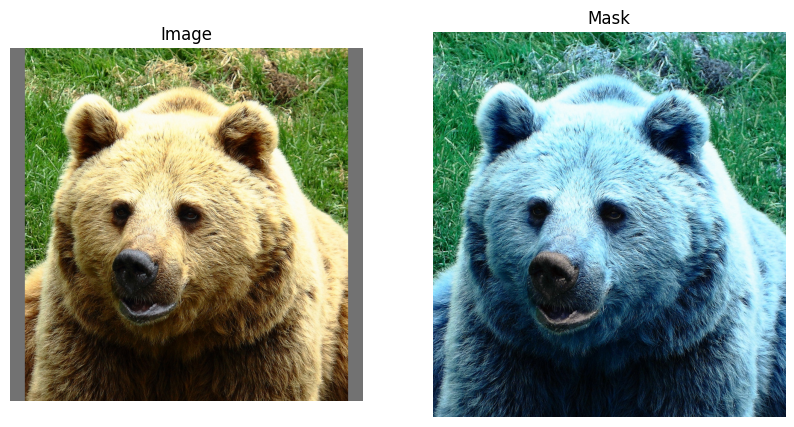

In [94]:
import torch
import matplotlib.pyplot as plt

# Assuming the function returns the following
img_tensor, mask_tensor, labels_out, file_name, shapes = dataset[1]

# Convert tensors to numpy arrays for visualization
img = img_tensor.numpy()
mask = mask_tensor.numpy()

# Check if the image is grayscale or RGB
if img.ndim == 3:  # RGB image
    img = img.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)

# Display the image and mask
plt.figure(figsize=(10, 5))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
plt.title("Image")
plt.axis('off')

# Show the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray' if img.ndim == 2 else None)  # Assuming mask is grayscale
plt.title("Mask")
plt.axis('off')

plt.show()


In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'yolov5/data/images/bus.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print() 

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images